<h3><strong>Ejercicio</strong></h3>

<h4><strong>Descripción del Problema:</strong></h4>

<div style="text-align: left;"> 
- Se dispone de una base de datos que registra el rendimiento diario de diferentes palas y camiones de transporte de mineral.<br>
- La información con la que se cuenta es la cantidad de tonelaje movido durante un día de operación y el número de paladas.<br>
- El objetivo principal es identificar los equipos de mejor rendimiento en términos de tonelaje extraído por día, así como los<br> 
principales factores que influyen en esta métrica.<br></div>

In [46]:
# Se realiza un ETL y un EDA, para obtener una nueva Dataframe que se utilizará para algún ML
# Importar librerías
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

# para eliminar warnings en python
import warnings
warnings.simplefilter('ignore')

In [47]:
# Lee el archivo CSV
archivo_csv = 'timeseries_haul_loading_data.csv'

In [48]:
# Dataframe
df = pd.read_csv(archivo_csv)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395680 entries, 0 to 395679
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   truck               395680 non-null  object 
 1   loader              395680 non-null  object 
 2   ton                 395680 non-null  float64
 3   n_shovel            395680 non-null  float64
 4   truck_total_cycle   395680 non-null  float64
 5   loader_total_cycle  395680 non-null  float64
 6   distance_empty      395680 non-null  float64
 7   distance_full       395680 non-null  float64
 8   date                395680 non-null  object 
dtypes: float64(6), object(3)
memory usage: 27.2+ MB


In [50]:
# Muestra las primeras filas del DataFrame
df.head()

,truck,loader,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full,date
0,CAEX56,PH06,299.682208,3.0,2158.0,315.0,4975.0,5191.0,2023-01-01
1,CAEX64,PH48,316.673117,3.0,1737.0,353.0,5152.0,4960.0,2023-01-01
2,CAEX41,PH06,340.529701,3.0,2210.0,388.0,5042.0,4859.0,2023-01-01
3,CAEX41,PH06,292.835476,3.0,2073.0,260.0,5005.0,4869.0,2023-01-01
4,CAEX71,PH06,337.056639,3.0,2346.0,148.0,5614.0,5289.0,2023-01-01


In [51]:
# Asumir que la columna se llama "truck"
valores_unicos = df['truck'].unique()
valores_unicos

array(['CAEX56', 'CAEX64', 'CAEX41', 'CAEX71', 'CAEX85', 'CAEX47',
       'CAEX90', 'CAEX62', 'CAEX10', 'CAEX24', 'CAEX48', 'CAEX93',
       'CAEX31', 'CAEX81', 'CAEX87', 'CAEX55', 'CAEX37', 'CAEX58',
       'CAEX34', 'CAEX13', 'CAEX44', 'CAEX08', 'CAEX66', 'CAEX39',
       'CAEX42', 'CAEX84', 'CAEX52', 'CAEX60', 'CAEX73', 'CAEX80',
       'CAEX54', 'CAEX98', 'CAEX25', 'CAEX70', 'CAEX23', 'CAEX01',
       'CAEX21', 'CAEX74', 'CAEX46', 'CAEX17', 'CAEX07', 'CAEX30',
       'CAEX49', 'CAEX94', 'CAEX96', 'CAEX22', 'CAEX61'], dtype=object)

In [52]:
# Asumir que la columna se llama "loader" 
valores_unicos_pala = df['loader'].unique()
valores_unicos_pala

array(['PH06', 'PH48', 'PH55', 'PH58'], dtype=object)

<h4><strong>Diccionario de datos</strong></h4>
<p>A continuación, se presenta el diccionario de las variables de la base de datos:<br></p>

| Variable | Descripción |
|----------|-------------|
| truck    | Código de camión |
| loader   | Código de pala |
| ton | Tonelaje con que ser carga camión |
| n_shovel | Número de paladas que fueron necesarias para cargar camión |
| truck_total_cycle | Ciclo total de camión (s) |
| loader_total_cycle | Ciclo total pala (s) |
| distance_empty | Distancia que recorre CAEX vacío (m) |
| distance_full | Distancia que recorre CAEX lleno (m) |
| date | Fecha toma de registro |

<h4><strong>Tipos de Variable:</strong></h4>

<p><strong>1.	Variables dependientes potenciales:</strong><br></p>
•	ton: Tonelaje transportado (camión)<br></p>
•	truck_total_cycle: Tiempo total del ciclo del camión<br></p>
•	loader_total_cycle: Tiempo total del ciclo del cargador (pala)<br></p>

<p><strong>2.	Variables predictoras:</strong><br></p>
•	distance_empty: Distancia recorrida vacío<br></p>
•	distance_full: Distancia recorrida cargado<br></p>
•	n_shovel: Número de palas<br></p>

<p><strong>Variables categóricas:</strong><br></p>
•	truck: Identificador del camión<br></p>
•	loader: Identificador del cargador<br></p>
•	date: Variable temporal<br></p>


In [53]:
# Obtener la cantidad de valores nulos por columna 
valores_nulos = df.isnull().sum() 
# Mostrar la cantidad de valores nulos por columna 
print(valores_nulos)

truck                 0
loader                0
ton                   0
n_shovel              0
truck_total_cycle     0
loader_total_cycle    0
distance_empty        0
distance_full         0
date                  0
dtype: int64


In [54]:
# Verificar si hay valores faltantes en el DataFrame 
hay_valores_faltantes = df.isnull().any().any() 
# Mostrar el resultado 
if hay_valores_faltantes: 
    print("Hay valores faltantes en el DataFrame.") 
else: 
    print("No hay valores faltantes en el DataFrame.")

No hay valores faltantes en el DataFrame.


In [55]:
# Estadística descriptiva de la dataframe (variables cuantitativas continuas):
df.describe()

,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full
count,395680.000000,395680.000000,395680.000000,395680.000000,395680.000000,395680.000000
mean,318.007490,3.316556,2284.313481,305.073340,6161.241612,5782.712235
std,18.124753,0.558689,856.620246,116.657122,2569.465489,2355.404982
min,0.000000,3.000000,23.000000,0.000000,512.000000,504.000000
25%,305.666647,3.000000,1633.000000,217.000000,3931.000000,3754.000000
50%,317.758250,3.000000,2134.000000,303.000000,6009.000000,5412.000000
75%,330.125978,4.000000,2945.000000,390.000000,8059.000000,7798.000000
max,384.927167,15.000000,15812.000000,11692.000000,15783.000000,15691.000000


<h4><strong>Acá se muestra la Distribución de los datos presentados:</strong></h4>

Count (Cantidad):

395680: Indica el número total de observaciones no nulas en cada columna, lo cual significa que no hay valores faltantes en los datos.

Mean (Media):

Representa el valor promedio de cada columna.

Por ejemplo, la media de <strong>ton</strong> es 318.007490, lo que indica que, en promedio, se movieron 318 toneladas por día.

Standard Deviation (Desviación Estándar):

Mide la dispersión de los datos respecto a la media.

Una desviación estándar alta, como la de <strong>distance_empty</strong> (2569.465489), indica que los valores están muy dispersos alrededor de la media.

Min (Valor Mínimo):

El valor mínimo observado en cada columna.

Por ejemplo, la columna <strong>ton</strong> tiene un valor mínimo de 0, lo cual podría ser un valor atípico o un error de entrada de datos.

25% (Percentil 25):

Indica el valor por debajo del cual se encuentra el 25% de las observaciones.

Para <strong>ton</strong>, el 25% de los días tuvieron un movimiento de toneladas menor a 305.666647.

50% (Median/Mediana):

Representa el valor central de la distribución de los datos (Percentil 50).

La mediana de <strong>ton</strong> es 317.758250, lo que indica que la mitad de los días tuvieron un movimiento de toneladas inferior a este valor y la otra mitad superior.

75% (Percentil 75):

Indica el valor por debajo del cual se encuentra el 75% de las observaciones.

En <strong>n_shovel</strong>, el 75% de las observaciones tienen un valor de 4 ó menos.

Max (Valor Máximo):

El valor máximo observado en cada columna.

Por ejemplo, <strong>truck_total_cycle</strong> tiene un valor máximo de 15812, indicando que en algún día específico, el ciclo total del camión fue extremadamente alto. 

<h4><strong>Análisis de Sesgo:</strong></h4>

<p><strong>Media vs Mediana:</strong><br></p>

<strong>ton:</strong> La media (318.007490) y la mediana (317.758250) son bastante cercanas, lo que sugiere que no hay un sesgo significativo.<br>

<strong>n_shovel:</strong> La media (3.316556) y la mediana (3.000000) muestran una pequeña diferencia, lo que indica un ligero sesgo hacia valores más altos.<br>

<strong>truck_total_cycle:</strong> La media (2284.313481) es mayor que la mediana (2134.000000), lo que sugiere un sesgo positivo (hacia la derecha).<br>

<strong>loader_total_cycle:</strong> La media (305.073340) y la mediana (303.000000) son bastante cercanas, lo que sugiere poco o ningún sesgo.<br>

<strong>distance_empty:</strong> La media (6161.241612) es cercana a la mediana (6009.000000), lo que indica un sesgo bajo.<br>

<strong>distance_full:</strong> La media (5782.712235) es cercana a la mediana (5412.000000), lo que sugiere un pequeño sesgo positivo.<br>

<h4><strong>Otros Factores a Considerar:</strong></h4>

<p><strong>Valores Máximos y Mínimos:</strong><br>

En algunas variables, como <strong>truck_total_cycle</strong> y <strong>loader_total_cycle</strong>, los valores máximos son significativamente mayores que los<br> 
percentiles 75%, lo que indica la presencia de posibles valores atípicos que podrían influir en la media y crear un sesgo.<br>

<p><strong>Distribución:</strong><br></p>

La desviación estándar alta en algunas variables indica una dispersión significativa de los datos,<br> 
lo cual puede influir en la percepción del sesgo.<br></p>

<h4><strong>Conclusión:</strong></h4>

<p>En general, la mayoría de las variables parecen tener un sesgo bajo, con algunas excepciones donde hay<br> 
ligeras diferencias entre la media y la mediana, lo que sugiere un pequeño sesgo.<br> 
Los valores atípicos también deben considerarse, ya que pueden afectar el análisis de sesgo.<br></p>

In [56]:
# Ver valores atípicos (outliers)
# Selecciona solo las columnas numéricas 
df_numerico = df.select_dtypes(include=[float, int]) 

# Calcular IQR para cada columna numérica 
Q1 = df_numerico.quantile(0.25) 
Q3 = df_numerico.quantile(0.75) 
IQR = Q3 - Q1 

# Identificar outliers usando el IQR 
outliers = ((df_numerico < (Q1 - 1.5 * IQR)) | (df_numerico > (Q3 + 1.5 * IQR))).sum() 

# Mostrar la cantidad de outliers por columna 
print(outliers)

ton                   2382
n_shovel              2403
truck_total_cycle     1154
loader_total_cycle    1455
distance_empty        2060
distance_full         1787
dtype: int64


In [57]:
# Número total de registros 
total_registros = 395680 
# Calcular el porcentaje de valores atípicos por columna 
outliers_percentage = (outliers / total_registros) * 100
# Redondear los porcentajes a 2 decimales 
outliers_percentage_rounded = outliers_percentage.round(2) 
# Mostrar el porcentaje de valores atípicos por columna 
outliers_percentage_rounded

ton                   0.60
n_shovel              0.61
truck_total_cycle     0.29
loader_total_cycle    0.37
distance_empty        0.52
distance_full         0.45
dtype: float64

<h4><strong>Evaluación de Significatividad de los outliers:</strong></h4>
<strong>Significatividad:</strong>

<p>Los porcentajes de outliers que resultan son menores al 1%, lo cual generalmente se considera bajo.<br> 
Esto sugiere que los outliers pueden no tener un impacto significativo en los análisis globales.<br>

Sin embargo, la significatividad también depende del contexto del análisis y de cómo estos outliers afectan los resultados específicos.<br></p>

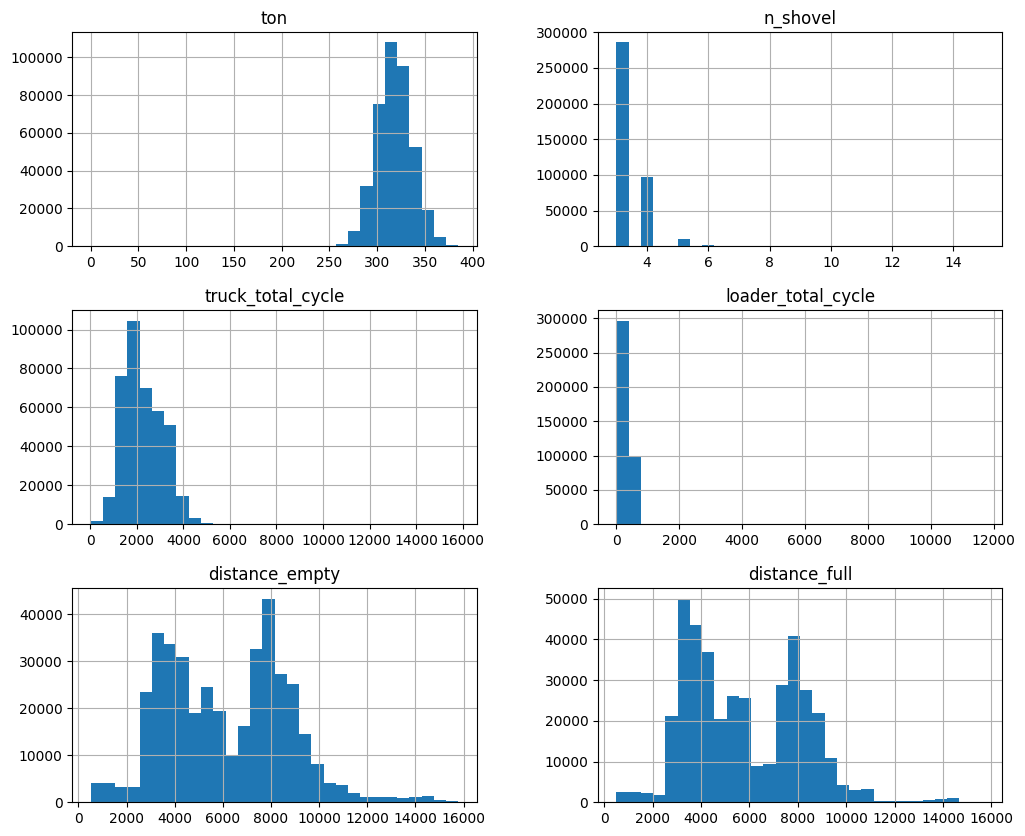

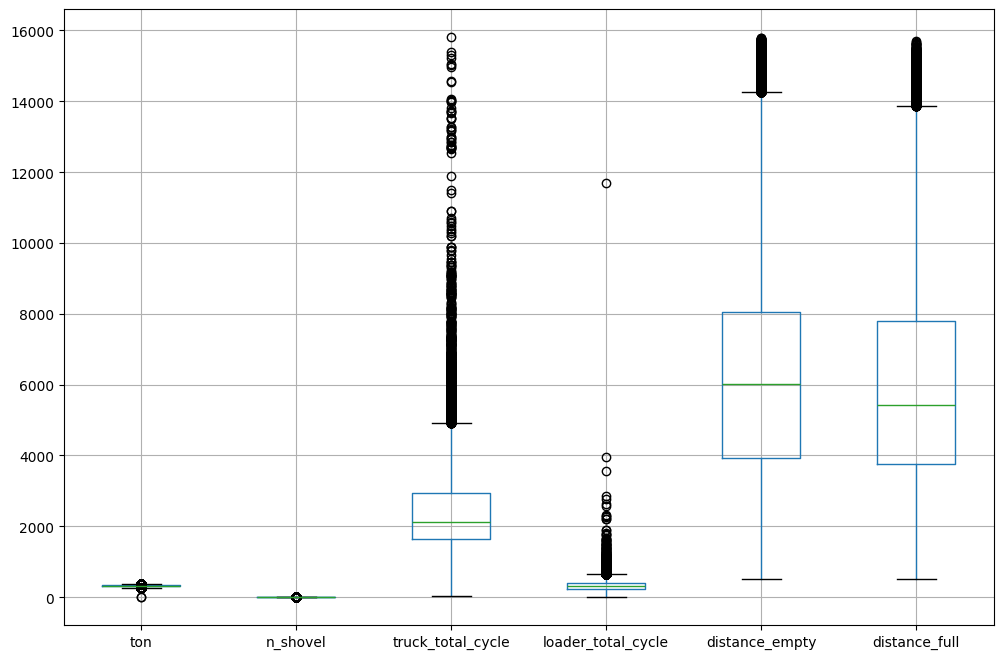

In [58]:
# Manejo de Outliers
# Histogramas
df_numerico.hist(bins=30, figsize=(12, 10))
plt.show()

# Boxplots
df_numerico.boxplot(figsize=(12, 8))
plt.show()


In [59]:
# Ver los datos sin Outliers
# Identificar outliers 
outliers = (df_numerico < (Q1 - 1.5 * IQR)) | (df_numerico > (Q3 + 1.5 * IQR)) 
# Filtrar los datos para eliminar los outliers 
df_sin_outliers = df_numerico[~outliers.any(axis=1)] 
# Mostrar los datos sin outliers 
df_sin_outliers

,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full
0,299.682208,3.0,2158.0,315.0,4975.0,5191.0
1,316.673117,3.0,1737.0,353.0,5152.0,4960.0
2,340.529701,3.0,2210.0,388.0,5042.0,4859.0
3,292.835476,3.0,2073.0,260.0,5005.0,4869.0
4,337.056639,3.0,2346.0,148.0,5614.0,5289.0
...,...,...,...,...,...,...
395675,320.327729,3.0,1976.0,320.0,1671.0,4884.0
395676,274.369483,4.0,1826.0,275.0,4021.0,5000.0
395677,319.958519,3.0,1834.0,268.0,4630.0,4882.0
395678,296.690314,3.0,1729.0,318.0,3925.0,3941.0


In [60]:
# Datos Sin outliers
df_sin_outliers.describe()

,ton,n_shovel,truck_total_cycle,loader_total_cycle,distance_empty,distance_full
count,385181.000000,385181.000000,385181.000000,385181.000000,385181.000000,385181.000000
mean,317.913422,3.295908,2262.837271,302.596050,6112.193055,5742.323194
std,17.674684,0.507345,817.490090,110.068517,2491.440208,2283.953384
min,268.990428,3.000000,23.000000,0.000000,515.000000,504.000000
25%,305.726366,3.000000,1627.000000,216.000000,3919.000000,3749.000000
50%,317.723155,3.000000,2123.000000,302.000000,5980.000000,5398.000000
75%,329.978612,4.000000,2925.000000,388.000000,8039.000000,7780.000000
max,366.808994,5.000000,4912.000000,649.000000,14251.000000,13864.000000


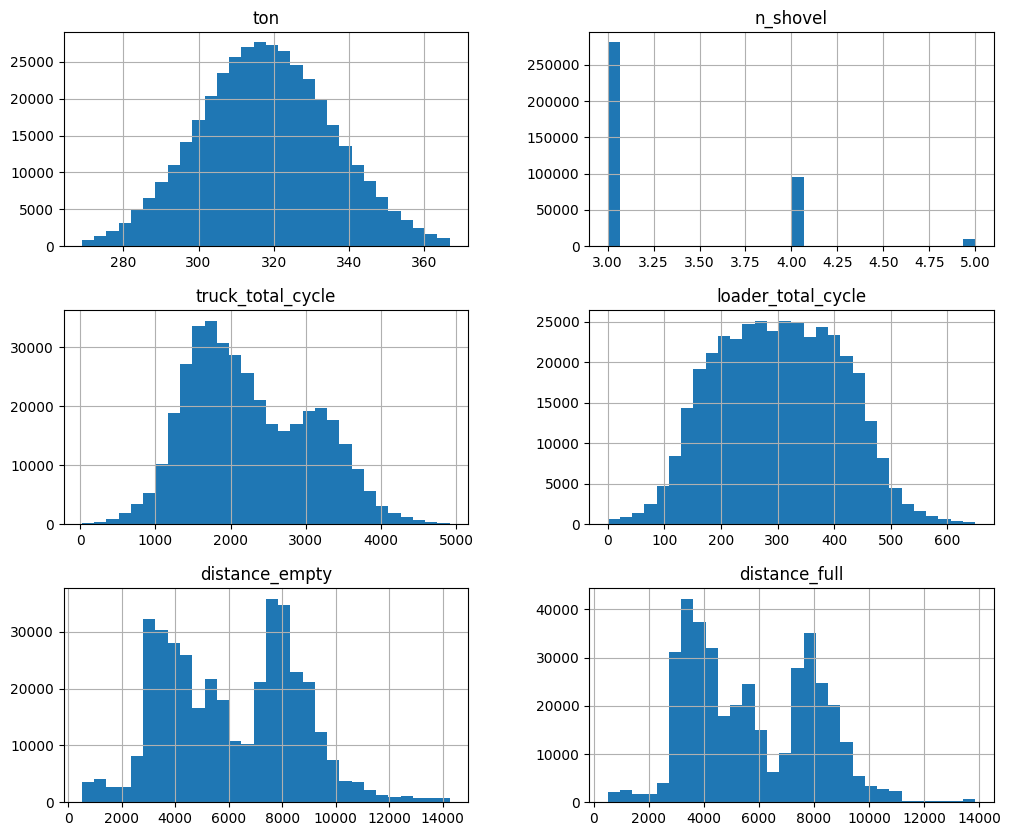

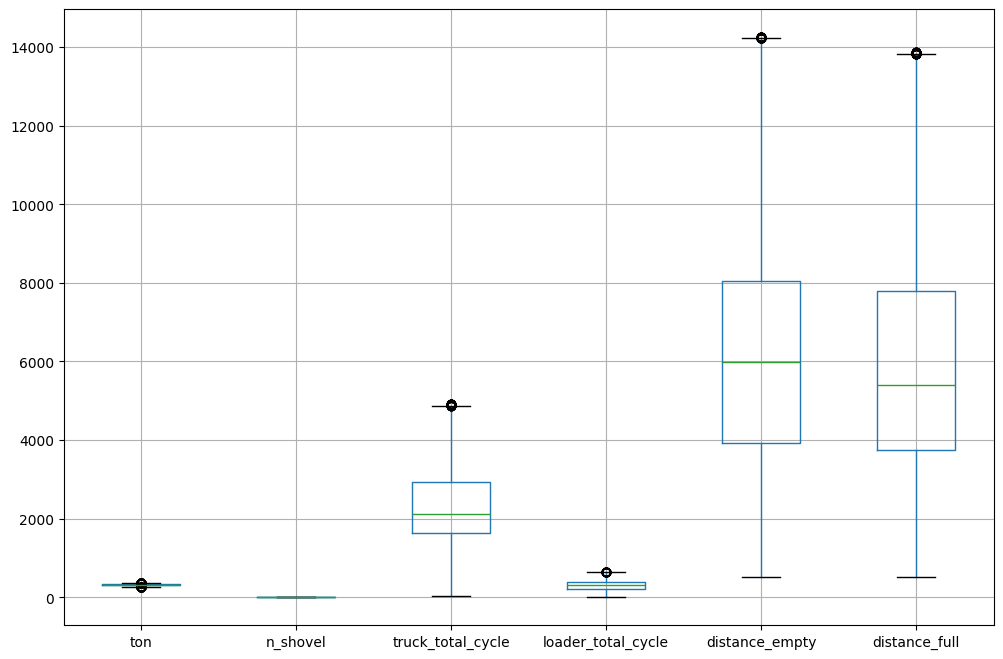

In [61]:
# Histogramas
df_sin_outliers.hist(bins=30, figsize=(12, 10))
plt.show()

# Boxplots
df_sin_outliers.boxplot(figsize=(12, 8))
plt.show()


<h4><strong>Observaciones:</strong></h4>

La nueva estadística descriptiva sin los valores atípicos, muestran lo siguiente:

<strong>Count:</strong> Con 385.181 registros, se ha eliminado una pequeña fracción de los datos originales (aproximadamente 2.7%) al excluir los outliers.

<strong>Mean (Media):</strong> Las medias son muy cercanas a las originales, lo cual indica que los outliers no estaban desviando significativamente el promedio.

<strong>Standard Deviation (Desviación Estándar):</strong> Las desviaciones estándar han disminuido ligeramente, reflejando una menor variabilidad en los datos sin outliers.

<strong>Min/Max:</strong> Los valores mínimos y máximos están ahora más concentrados, lo que puede hacer un análisis más fiable y menos propenso a ser influidos por valores extremos.

<strong>Interpretación:</strong>

<strong>Rendimiento General:</strong> Con los outliers eliminados, los datos reflejan un rendimiento más consistente y predecible.

<strong>Decisiones Basadas en Datos:</strong> Los análisis que se realicen sobre estos datos serán menos susceptibles a variaciones extremas, mejorando la precisión de las predicciones y decisiones.

<strong>Visualización y Reportes:</strong> Los gráficos y reportes serán más claros y representativos de la mayoría de las observaciones sin ser afectados por unos pocos valores atípicos.

Eliminar outliers puede ser una práctica útil para mejorar la calidad de los análisis y hacer que los resultados sean más robustos y fiables.

Ahora, si se quieren hacer cálculos de rendimiento, como: Eficiencia de cada equipo dividiendo el tonelaje movido por el tiempo total del ciclo.

<strong>Cálculo del Rendimiento del Camión</strong> (sin omitir outliers)
<p><strong>Rendimiento del Camión:</strong> Se calcula la eficiencia de cada camión dividiendo el tonelaje<br> 
<strong>(ton)</strong> por el tiempo total del ciclo del camión <strong>(truck_total_cycle).</strong><br></p>

In [62]:
# Cálculo de la eficiencia del camión
df['eficiencia_camion'] = df['ton'] / df['truck_total_cycle']

In [63]:
# Mostrar las primeras filas para verificar
print(df[['truck', 'ton', 'truck_total_cycle', 'eficiencia_camion']].head())

    truck         ton  truck_total_cycle  eficiencia_camion
0  CAEX56  299.682208             2158.0           0.138870
1  CAEX64  316.673117             1737.0           0.182310
2  CAEX41  340.529701             2210.0           0.154086
3  CAEX41  292.835476             2073.0           0.141262
4  CAEX71  337.056639             2346.0           0.143673


In [64]:
# Obtener estadísticas descriptivas de la eficiencia del camión
estadisticas_eficiencia_camion = df['eficiencia_camion'].describe()
print("Estadísticas de la Eficiencia del Camión:\n", estadisticas_eficiencia_camion)

Estadísticas de la Eficiencia del Camión:
 count    395680.000000
mean          0.164181
std           0.110443
min           0.000000
25%           0.107824
50%           0.148649
75%           0.195520
max          14.400054
Name: eficiencia_camion, dtype: float64


<strong>Cálculo del Rendimiento de la Pala</strong>
<p><strong>Rendimiento de la Pala:</strong> Se calcula la eficiencia de cada pala dividiendo el tonelaje<br> 
<strong>(ton)</strong> por el tiempo total del ciclo de la pala <strong>(loader_total_cycle).</strong><br></p>

In [65]:
# Cálculo de la eficiencia de la pala
df['eficiencia_pala'] = df['ton'] / df['loader_total_cycle']

In [66]:
# Mostrar las primeras filas para verificar
print(df[['loader', 'ton', 'loader_total_cycle', 'eficiencia_pala']].head())

  loader         ton  loader_total_cycle  eficiencia_pala
0   PH06  299.682208               315.0         0.951372
1   PH48  316.673117               353.0         0.897091
2   PH06  340.529701               388.0         0.877654
3   PH06  292.835476               260.0         1.126290
4   PH06  337.056639               148.0         2.277410


In [67]:
# Obtener estadísticas descriptivas de la eficiencia de la pala
estadisticas_eficiencia_pala = df['eficiencia_pala'].describe()
print("Estadísticas de la Eficiencia de la Pala:\n", estadisticas_eficiencia_pala)

Estadísticas de la Eficiencia de la Pala:
 count    3.956800e+05
mean              inf
std               NaN
min      0.000000e+00
25%      8.156656e-01
50%      1.048730e+00
75%      1.466310e+00
max               inf
Name: eficiencia_pala, dtype: float64


In [68]:
# Cálculo de eficiencia sin outliers:

# Cálculo de la eficiencia del camión

# Usar .copy() para asegurarse de que es una copia
df_sin_outliers = df_numerico[~outliers.any(axis=1)].copy() 
# Cálculo de la eficiencia del camión 
df_sin_outliers.loc[:, 'eficiencia_camion'] = df_sin_outliers['ton'] / df_sin_outliers['truck_total_cycle'] 
# Mostrar las primeras filas para verificar 
print(df_sin_outliers[['ton', 'truck_total_cycle', 'eficiencia_camion']].head())

          ton  truck_total_cycle  eficiencia_camion
0  299.682208             2158.0           0.138870
1  316.673117             1737.0           0.182310
2  340.529701             2210.0           0.154086
3  292.835476             2073.0           0.141262
4  337.056639             2346.0           0.143673


In [69]:
# Obtener estadísticas descriptivas de la eficiencia del camión
estadisticas_eficiencia_camion = df_sin_outliers['eficiencia_camion'].describe()
print("Estadísticas de la Eficiencia del Camión:\n", estadisticas_eficiencia_camion)

Estadísticas de la Eficiencia del Camión:
 count    385181.000000
mean          0.164982
std           0.110329
min           0.057018
25%           0.108536
50%           0.149479
75%           0.196102
max          14.400054
Name: eficiencia_camion, dtype: float64


In [70]:
# Cálculo de la eficiencia de la pala (omitiendo outliers)
# Selecciona todas las columnas
df_numerico = df.copy()

# Calcular IQR y filtrar outliers solo para columnas numéricas
df_num_only = df.select_dtypes(include=[float, int])
Q1 = df_num_only.quantile(0.25)
Q3 = df_num_only.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_num_only < (Q1 - 1.5 * IQR)) | (df_num_only > (Q3 + 1.5 * IQR))

# Filtrar los datos originales usando los índices de los outliers
df_sin_outliers = df[~outliers.any(axis=1)].copy()

# Cálculo de la eficiencia de la pala
df_sin_outliers['eficiencia_pala'] = df_sin_outliers['ton'] / df_sin_outliers['loader_total_cycle']

# Mostrar las primeras filas para verificar
print(df_sin_outliers[['loader', 'ton', 'loader_total_cycle', 'eficiencia_pala']].head())

  loader         ton  loader_total_cycle  eficiencia_pala
0   PH06  299.682208               315.0         0.951372
1   PH48  316.673117               353.0         0.897091
2   PH06  340.529701               388.0         0.877654
3   PH06  292.835476               260.0         1.126290
4   PH06  337.056639               148.0         2.277410


In [71]:
# Obtener estadísticas descriptivas de la eficiencia de pala
estadisticas_eficiencia_pala = df_sin_outliers['eficiencia_pala'].describe()
print("Estadísticas de la Eficiencia de Pala:\n", estadisticas_eficiencia_pala)

Estadísticas de la Eficiencia de Pala:
 count    356708.000000
mean          1.141246
std           0.424860
min           0.432520
25%           0.808503
50%           1.022274
75%           1.383883
max           2.442137
Name: eficiencia_pala, dtype: float64


Por lo tanto, escogemos los datos sin outliers ✔✔

======<h4><strong>Requerimientos del Análisis:</strong></h4>
<p>Se le solicita realizar los análisis que estime pertinentes para cumplir los siguientes objetivos:<br>
<strong>1. Ranking de Desempeño:</strong> Elaborar un ranking del desempeño de los equipos con base en su eficiencia en el transporte de tonelaje.<br>
<strong>2. Identificación de Factores Críticos:</strong> Determinar cuáles son las variables que más influyen en el rendimiento de los equipos.<br>
<strong>3. Recomendaciones:</strong> Proponer acciones para mejorar el rendimiento en el próximo año de operación, estableciendo claramente<br>
el alcance de dichas recomendaciones. Las recomendaciones propuestas no necesariamente tienen que estar directamente basadas en los resultados<br>
obtenidos anteriormente.<br>
Pueden incluir supuestos debidamente justificados.<br></p>

In [72]:
# 1. Ranking de Desempeño:
# Para elaborar un ranking del desempeño de los equipos basado en su eficiencia en el transporte de tonelaje, se realiza lo siguiente:
# Ranking de eficiencia de camiones
ranking_camiones = df_sin_outliers.groupby('truck')['eficiencia_camion'].mean().sort_values(ascending=False)
print("Ranking de Camiones:\n", ranking_camiones)

Ranking de Camiones:
 truck
CAEX61    0.163963
CAEX62    0.163937
CAEX39    0.161160
CAEX08    0.160775
CAEX47    0.159404
CAEX41    0.158263
CAEX30    0.158159
CAEX71    0.157793
CAEX52    0.157594
CAEX55    0.156853
CAEX60    0.156464
CAEX24    0.156281
CAEX58    0.156263
CAEX34    0.156221
CAEX96    0.156213
CAEX54    0.156118
CAEX74    0.155777
CAEX49    0.155709
CAEX46    0.155618
CAEX42    0.155208
CAEX48    0.155164
CAEX73    0.155069
CAEX44    0.154885
CAEX87    0.154842
CAEX37    0.154665
CAEX01    0.154563
CAEX80    0.154350
CAEX25    0.154299
CAEX70    0.154178
CAEX23    0.154003
CAEX10    0.153971
CAEX22    0.153848
CAEX90    0.153664
CAEX98    0.153416
CAEX93    0.153096
CAEX64    0.152892
CAEX31    0.152558
CAEX66    0.152504
CAEX85    0.152474
CAEX56    0.152434
CAEX81    0.152236
CAEX13    0.151523
CAEX17    0.151454
CAEX84    0.150259
CAEX07    0.149421
CAEX21    0.149300
CAEX94    0.148517
Name: eficiencia_camion, dtype: float64


In [73]:
# Ranking de eficiencia de palas
ranking_palas = df_sin_outliers.groupby('loader')['eficiencia_pala'].mean().sort_values(ascending=False)
print("Ranking de Palas:\n", ranking_palas)

Ranking de Palas:
 loader
PH58    1.167348
PH48    1.166385
PH06    1.111216
PH55    1.083882
Name: eficiencia_pala, dtype: float64


Métrica de Tonelaje por carga camión por paladas: `ton / n_shovel`.

In [74]:
# Calcular el tonelaje por paladas (toneladas por paladas en cada camión) 
df_sin_outliers['tonelaje_por_paladas'] = df_sin_outliers['ton'] / df_sin_outliers['n_shovel'] 
# Mostrar el DataFrame con la nueva columna
# Mostrar las primeras filas para verificar
print(df_sin_outliers[['ton', 'n_shovel', 'tonelaje_por_paladas']].head())

          ton  n_shovel  tonelaje_por_paladas
0  299.682208       3.0             99.894069
1  316.673117       3.0            105.557706
2  340.529701       3.0            113.509900
3  292.835476       3.0             97.611825
4  337.056639       3.0            112.352213


In [75]:
# Ranking de eficiencia de carga por paladas (tonelaje) en promedio:
ranking_tonelajes = df_sin_outliers.groupby('truck')['tonelaje_por_paladas'].mean().sort_values(ascending=False)
print("Ranking de Tonelaje por camiones:\n", ranking_tonelajes)

Ranking de Tonelaje por camiones:
 truck
CAEX47    102.577577
CAEX39    102.016385
CAEX37    101.762911
CAEX62    101.065014
CAEX60    100.412626
CAEX25    100.367356
CAEX70    100.065427
CAEX13    100.003092
CAEX71     99.835233
CAEX41     99.763324
CAEX49     99.241387
CAEX54     99.159109
CAEX93     98.656016
CAEX80     98.633756
CAEX55     98.469901
CAEX52     98.465131
CAEX85     98.462617
CAEX90     98.425892
CAEX66     98.318157
CAEX96     98.061050
CAEX08     98.008609
CAEX23     97.942804
CAEX21     97.855565
CAEX24     97.572584
CAEX87     97.555887
CAEX44     97.503388
CAEX64     97.334797
CAEX22     97.310605
CAEX42     97.238962
CAEX48     97.209364
CAEX58     97.074681
CAEX30     97.032170
CAEX73     96.938463
CAEX10     96.887635
CAEX84     96.764414
CAEX17     96.675497
CAEX07     96.637666
CAEX94     96.217259
CAEX81     96.109238
CAEX34     96.021736
CAEX74     95.814414
CAEX31     95.716634
CAEX98     95.498515
CAEX01     95.488670
CAEX46     93.807751
CAEX56     93.

In [76]:
# Cálculo de la eficiencia de distancia (distancia con camión cargado y distancia camión vacío)
df_sin_outliers['eficiencia_distancia'] = df_sin_outliers['distance_full'] / df_sin_outliers['distance_empty']

# Filtrar camiones con eficiencia de distancia mayor a 1
df_mayor_1 = df_sin_outliers[df_sin_outliers['eficiencia_distancia'] > 1]

# Filtrar camiones con eficiencia de distancia menor a 1
df_menor_1 = df_sin_outliers[df_sin_outliers['eficiencia_distancia'] < 1]

# Agrupar por camión y calcular el promedio de eficiencia de distancia para los que son mayores a 1
ranking_eficiencia_dist_mayor_1 = df_mayor_1.groupby('truck')['eficiencia_distancia'].mean().sort_values(ascending=False)

# Agrupar por camión y calcular el promedio de eficiencia de distancia para los que son menores a 1
ranking_eficiencia_dist_menor_1 = df_menor_1.groupby('truck')['eficiencia_distancia'].mean().sort_values(ascending=False)

# Mostrar los resultados
print("Ranking de Camiones con Eficiencia de Distancia Mayor a 1 (Promedio):")
print(ranking_eficiencia_dist_mayor_1)

print("\nRanking de Camiones con Eficiencia de Distancia Menor a 1 (Promedio):")
print(ranking_eficiencia_dist_menor_1)


Ranking de Camiones con Eficiencia de Distancia Mayor a 1 (Promedio):
truck
CAEX30    1.443043
CAEX87    1.423524
CAEX31    1.422499
CAEX85    1.414346
CAEX62    1.413142
CAEX70    1.412313
CAEX55    1.405097
CAEX24    1.403801
CAEX46    1.399355
CAEX66    1.399244
CAEX74    1.395897
CAEX34    1.395545
CAEX56    1.394091
CAEX54    1.393762
CAEX17    1.392702
CAEX80    1.391489
CAEX64    1.389578
CAEX25    1.388962
CAEX10    1.388805
CAEX73    1.385046
CAEX01    1.384986
CAEX41    1.382895
CAEX93    1.382372
CAEX07    1.381125
CAEX47    1.380416
CAEX44    1.379115
CAEX71    1.378229
CAEX48    1.378049
CAEX98    1.377387
CAEX84    1.375643
CAEX81    1.375482
CAEX23    1.375186
CAEX39    1.374454
CAEX22    1.373824
CAEX37    1.371545
CAEX94    1.371070
CAEX90    1.365326
CAEX49    1.365220
CAEX52    1.365077
CAEX96    1.364822
CAEX58    1.363188
CAEX42    1.362748
CAEX13    1.359341
CAEX60    1.346267
CAEX08    1.344507
CAEX21    1.330083
CAEX61    1.241030
Name: eficiencia_distancia, dty

Entonces La eficiencia de distancia da una idea de cuán eficientemente están operando los camiones en términos de minimizar viajes desperdiciados.

### Camiones con Eficiencia de Distancia Mayor a 1
- **Significado**: Una eficiencia de distancia mayor a 1 indica que el camión recorre más distancia con carga que sin carga. 
- **Interpretación**:
  - **Alta Eficiencia**: Estos camiones están siendo utilizados eficientemente, ya que pasan más tiempo transportando material que viajando vacíos.
  - **Menos Viajes Desperdiciados**: Esto sugiere que hay menos viajes desperdiciados, lo que es ideal en términos de costos operativos y uso del combustible.
  - **Optimización**: Puede significar que las rutas y la planificación de las cargas están optimizadas, minimizando el tiempo y la distancia que los camiones viajan sin carga.

### Camiones con Eficiencia de Distancia Menor a 1
- **Significado**: Una eficiencia de distancia menor a 1 indica que el camión recorre más distancia sin carga que con carga.
- **Interpretación**:
  - **Baja Eficiencia**: Estos camiones están siendo utilizados de manera menos eficiente, ya que pasan más tiempo viajando vacíos.
  - **Más Viajes Desperdiciados**: Esto sugiere que hay más viajes desperdiciados, lo cual no es ideal para el costo operativo y el uso del combustible.
  - **Necesidad de Optimización**: Puede señalar que hay margen para optimizar las rutas y la planificación de las cargas, para reducir el tiempo y la distancia que los camiones viajan sin carga.

### Acciones Sugeridas
- **Para Camiones con Eficiencia Mayor a 1**:
  - **Mantener Prácticas**: Continuar con las prácticas actuales y buscar formas de mejorar aún más la eficiencia.
  - **Revisar y Monitorear**: Asegurarse de que estas prácticas se mantengan consistentes y buscar oportunidades de mejora continua.

- **Para Camiones con Eficiencia Menor a 1**:
  - **Revisar Rutas**: Evaluar y optimizar las rutas para reducir las distancias recorridas sin carga.
  - **Mejorar Planificación**: Ajustar la planificación de las cargas para asegurar que los camiones están cargando y descargando en ubicaciones que minimicen los viajes vacíos.
  - **Análisis de Patrones**: Realizar un análisis detallado de los patrones de operación para identificar áreas específicas donde se pueden realizar mejoras.

<h4><strong>Identificación de Factores Críticos:</strong></h4>
<strong>Análisis de Correlación:</strong>
<p>Se realiza un análisis de correlación para determinar qué variables tienen la mayor influencia en el rendimiento.<br></p>

In [77]:
# Calcular la matriz de correlación Camión
# Selecciona solo las columnas numéricas relevantes
df_sin_outliers_camion = df_sin_outliers[['eficiencia_camion', 'ton', 'n_shovel', 'truck_total_cycle', 'distance_empty', 'distance_full']]

In [78]:
# Calcular la matriz de correlación
matriz_correlacion_camion = df_sin_outliers_camion.corr()
matriz_correlacion_camion

,eficiencia_camion,ton,n_shovel,truck_total_cycle,distance_empty,distance_full
eficiencia_camion,1.000000,0.161387,0.045326,-0.926961,-0.598948,-0.727769
ton,0.161387,1.000000,0.191210,-0.007834,-0.016260,-0.030201
n_shovel,0.045326,0.191210,1.000000,-0.031183,-0.079664,-0.083984
truck_total_cycle,-0.926961,-0.007834,-0.031183,1.000000,0.612636,0.774067
distance_empty,-0.598948,-0.016260,-0.079664,0.612636,1.000000,0.599177
distance_full,-0.727769,-0.030201,-0.083984,0.774067,0.599177,1.000000


In [79]:
# Verificar que no haya NaN en las columnas seleccionadas
print(df_sin_outliers_camion.isna().sum())

# Mostrar la matriz de correlación
matriz_correlacion_camion


eficiencia_camion    0
ton                  0
n_shovel             0
truck_total_cycle    0
distance_empty       0
distance_full        0
dtype: int64


,eficiencia_camion,ton,n_shovel,truck_total_cycle,distance_empty,distance_full
eficiencia_camion,1.000000,0.161387,0.045326,-0.926961,-0.598948,-0.727769
ton,0.161387,1.000000,0.191210,-0.007834,-0.016260,-0.030201
n_shovel,0.045326,0.191210,1.000000,-0.031183,-0.079664,-0.083984
truck_total_cycle,-0.926961,-0.007834,-0.031183,1.000000,0.612636,0.774067
distance_empty,-0.598948,-0.016260,-0.079664,0.612636,1.000000,0.599177
distance_full,-0.727769,-0.030201,-0.083984,0.774067,0.599177,1.000000


In [80]:
# Verificar si hay valores NaN o inf en la matriz de correlación 
print("Hay NaN en la matriz de correlación?", matriz_correlacion_camion.isna().any()) 
print("Hay inf en la matriz de correlación?", matriz_correlacion_camion.isin([float('inf'), float('-inf')]).any())

Hay NaN en la matriz de correlación? eficiencia_camion    False
ton                  False
n_shovel             False
truck_total_cycle    False
distance_empty       False
distance_full        False
dtype: bool
Hay inf en la matriz de correlación? eficiencia_camion    False
ton                  False
n_shovel             False
truck_total_cycle    False
distance_empty       False
distance_full        False
dtype: bool


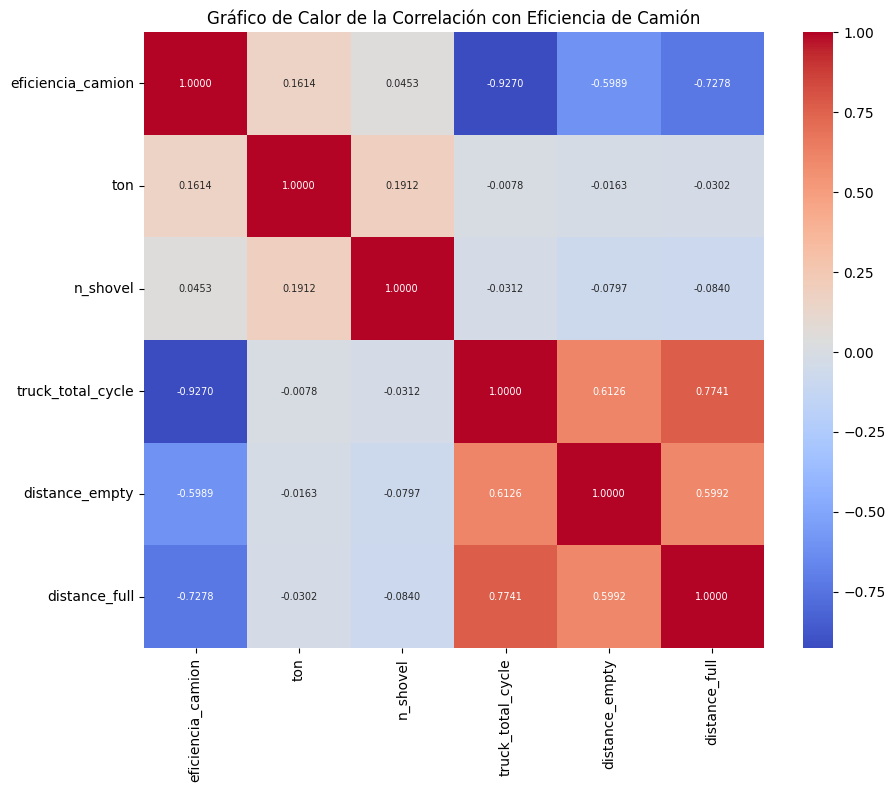

In [81]:
# Crear el gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_camion, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={"size": 7})
plt.title('Gráfico de Calor de la Correlación con Eficiencia de Camión')
plt.show()

In [82]:
# Calcular la matriz de correlación Pala
# Selecciona solo las columnas numéricas relevantes
df_sin_outliers_pala = df_sin_outliers[['eficiencia_pala', 'ton', 'n_shovel', 'loader_total_cycle', 'distance_empty', 'distance_full']]

In [83]:
# Calcular la matriz de correlación
matriz_correlacion_pala = df_sin_outliers_pala.corr()
matriz_correlacion_pala

,eficiencia_pala,ton,n_shovel,loader_total_cycle,distance_empty,distance_full
eficiencia_pala,1.000000,0.096107,-0.122869,-0.926124,0.033796,0.045594
ton,0.096107,1.000000,0.191210,0.041679,-0.016260,-0.030201
n_shovel,-0.122869,0.191210,1.000000,0.174739,-0.079664,-0.083984
loader_total_cycle,-0.926124,0.041679,0.174739,1.000000,-0.041894,-0.056753
distance_empty,0.033796,-0.016260,-0.079664,-0.041894,1.000000,0.599177
distance_full,0.045594,-0.030201,-0.083984,-0.056753,0.599177,1.000000


In [84]:
# Verificar que no haya NaN en las columnas seleccionadas
print(df_sin_outliers_pala.isna().sum())

# Mostrar la matriz de correlación
matriz_correlacion_pala

eficiencia_pala       0
ton                   0
n_shovel              0
loader_total_cycle    0
distance_empty        0
distance_full         0
dtype: int64


,eficiencia_pala,ton,n_shovel,loader_total_cycle,distance_empty,distance_full
eficiencia_pala,1.000000,0.096107,-0.122869,-0.926124,0.033796,0.045594
ton,0.096107,1.000000,0.191210,0.041679,-0.016260,-0.030201
n_shovel,-0.122869,0.191210,1.000000,0.174739,-0.079664,-0.083984
loader_total_cycle,-0.926124,0.041679,0.174739,1.000000,-0.041894,-0.056753
distance_empty,0.033796,-0.016260,-0.079664,-0.041894,1.000000,0.599177
distance_full,0.045594,-0.030201,-0.083984,-0.056753,0.599177,1.000000


In [85]:
# Verificar si hay valores NaN o inf en la matriz de correlación 
print("Hay NaN en la matriz de correlación?", matriz_correlacion_pala.isna().any()) 
print("Hay inf en la matriz de correlación?", matriz_correlacion_pala.isin([float('inf'), float('-inf')]).any())

Hay NaN en la matriz de correlación? eficiencia_pala       False
ton                   False
n_shovel              False
loader_total_cycle    False
distance_empty        False
distance_full         False
dtype: bool
Hay inf en la matriz de correlación? eficiencia_pala       False
ton                   False
n_shovel              False
loader_total_cycle    False
distance_empty        False
distance_full         False
dtype: bool


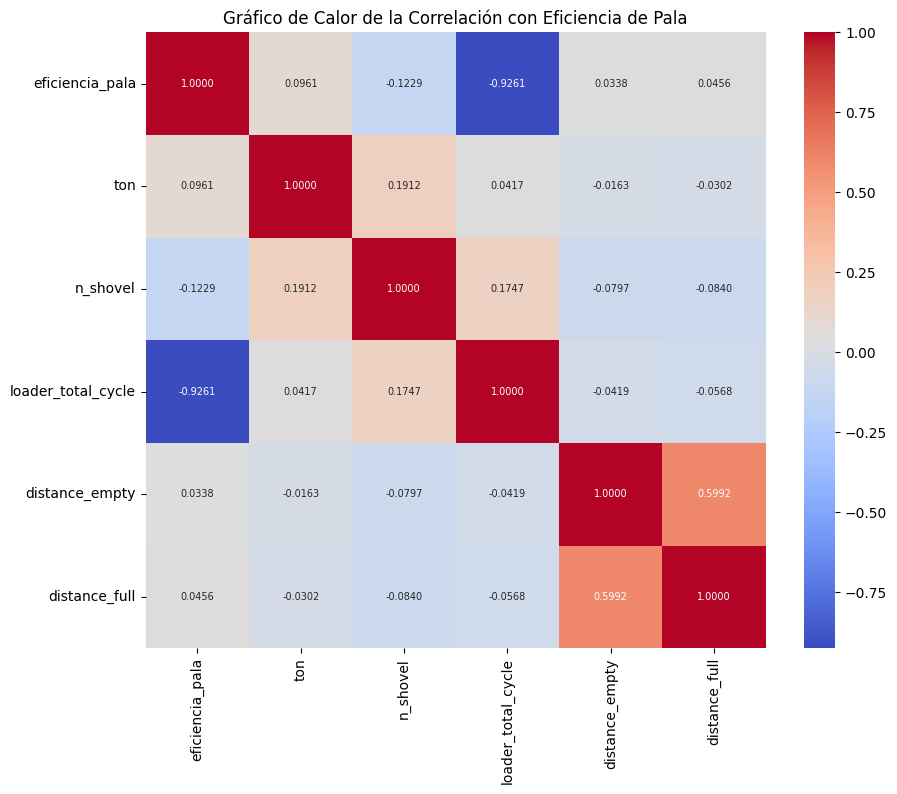

In [86]:
# Crear el gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_pala, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={"size": 7})
plt.title('Gráfico de Calor de la Correlación con Eficiencia de Pala')
plt.show()

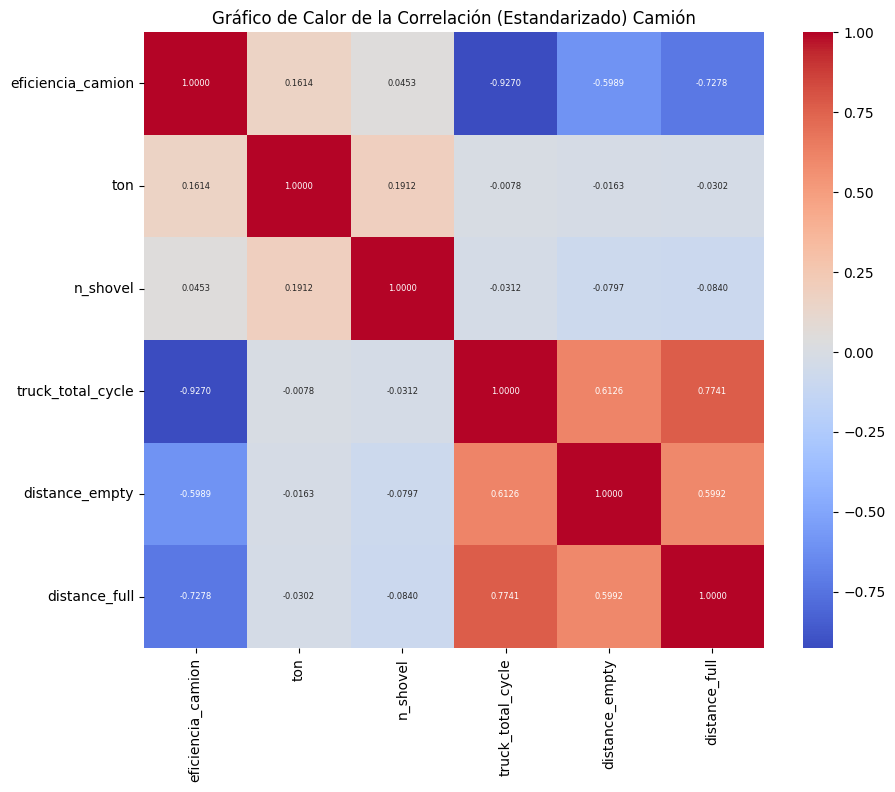

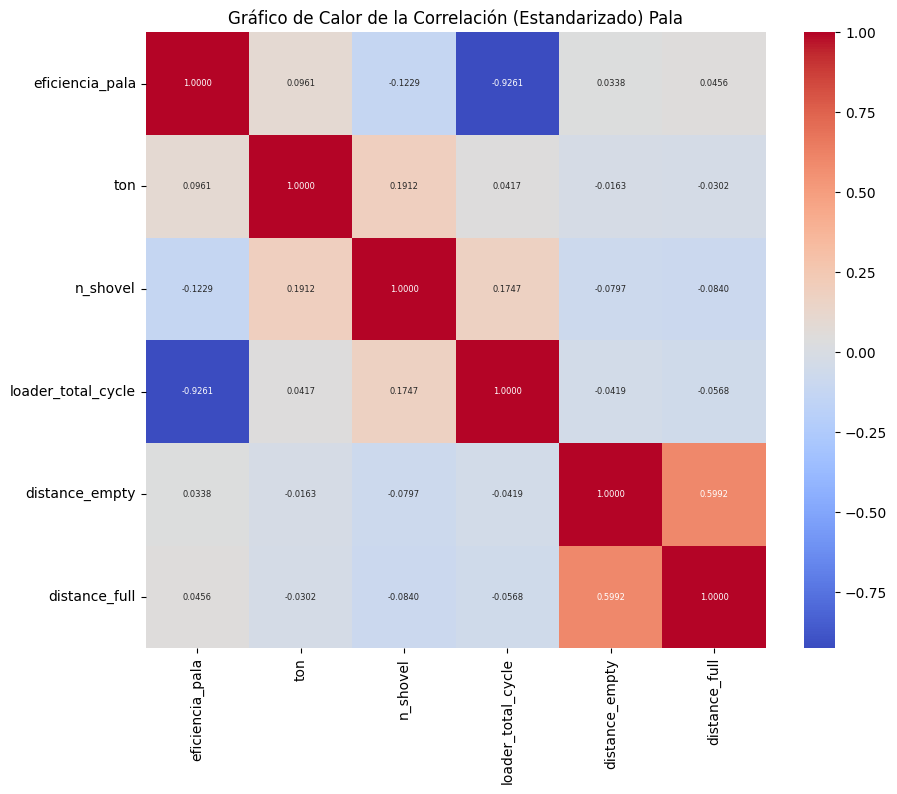

In [87]:
# Se estandarizan los valores por problemas en la correlación

# Seleccionar solo las columnas numéricas relevantes
# Camión
# Selecciona solo las columnas numéricas relevantes
df_sin_outliers_camion = df_sin_outliers[['eficiencia_camion', 'ton', 'n_shovel', 'truck_total_cycle', 'distance_empty', 'distance_full']]

# Pala
# Selecciona solo las columnas numéricas relevantes
df_sin_outliers_pala = df_sin_outliers[['eficiencia_pala', 'ton', 'n_shovel', 'loader_total_cycle', 'distance_empty', 'distance_full']]

# Estandarizar los datos
scaler = StandardScaler()

# Para Camión
df_sin_outliers_estandarizado_camion = pd.DataFrame(scaler.fit_transform(df_sin_outliers_camion), columns=df_sin_outliers_camion.columns)

# Para Pala
df_sin_outliers_estandarizado_pala = pd.DataFrame(scaler.fit_transform(df_sin_outliers_pala), columns=df_sin_outliers_pala.columns)

# Calcular la matriz de correlación Camión
matriz_correlacion_estandarizada_camion = df_sin_outliers_estandarizado_camion.corr()

# Calcular la matriz de correlación Pala
matriz_correlacion_estandarizada_pala = df_sin_outliers_estandarizado_pala.corr()

# Crear el gráfico de calor Camión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_estandarizada_camion, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={"size": 6})
plt.title('Gráfico de Calor de la Correlación (Estandarizado) Camión')
plt.show()

# Crear el gráfico de calor Pala
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion_estandarizada_pala, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={"size": 6})
plt.title('Gráfico de Calor de la Correlación (Estandarizado) Pala')
plt.show()


## **Análisis de la matriz de correlación de la eficiencia del camión y las otras variables.**

### **Interpretación de la Matriz de Correlación:**

#### **Eficiencia del Camión**:
- **Tonelaje (0.161387)**: Hay una correlación positiva débil entre la eficiencia del camión y el tonelaje. Esto sugiere que, a medida que aumenta el tonelaje, la eficiencia del camión también tiende a aumentar, aunque la relación no es muy fuerte.
- **Número de Paladas (0.045326)**: Hay una correlación positiva muy débil entre la eficiencia del camión y el número de paladas. Esto indica que el número de paladas tiene poco efecto sobre la eficiencia del camión.
- **Ciclo Total del Camión (-0.926961)**: Hay una fuerte correlación negativa entre la eficiencia del camión y el ciclo total del camión. Esto sugiere que, a medida que aumenta el ciclo total del camión, la eficiencia del camión disminuye significativamente.
- **Distancia Recorrida Vacío (-0.598948)**: Hay una correlación negativa moderada entre la eficiencia del camión y la distancia recorrida vacío. Esto indica que, a medida que el camión recorre más distancia vacío, su eficiencia tiende a disminuir.
- **Distancia Recorrida Cargado (-0.727769)**: Hay una fuerte correlación negativa entre la eficiencia del camión y la distancia recorrida cargado. Esto sugiere que, a medida que el camión recorre más distancia cargado, su eficiencia disminuye considerablemente.

### **Interpretación General:**
- **Correlaciones Positivas**: Las correlaciones positivas, aunque débiles, entre el tonelaje y el número de paladas con la eficiencia del camión indican que estos factores tienen un impacto positivo en la eficiencia del camión, pero no de manera significativa.
- **Correlaciones Negativas**: Las correlaciones negativas más fuertes y moderadas con el ciclo total del camión, la distancia recorrida vacío, y la distancia recorrida cargado sugieren que estos factores tienen un impacto negativo considerable en la eficiencia del camión.

### **Conclusiones:**
1. **Optimización del Ciclo Total del Camión**: Dado que el ciclo total del camión tiene una fuerte correlación negativa con la eficiencia del camión, optimizar y reducir el ciclo total podría mejorar significativamente la eficiencia del camión.
2. **Distancia Recorrida**: Tanto la distancia recorrida vacío como la distancia recorrida cargado tienen un impacto negativo en la eficiencia del camión. Minimizar estas distancias podría ayudar a mejorar la eficiencia.
3. **Tonelaje y Paladas**: Aunque el tonelaje y el número de paladas tienen una correlación positiva con la eficiencia, su impacto es relativamente débil. No obstante, mantener un buen balance en estas variables es importante para el rendimiento general.

## **Análisis de la matriz de correlación de la eficiencia de la pala y las otras variables.** 

### **Interpretación de la Matriz de Correlación:**

#### **Eficiencia de la Pala:**
- **Tonelaje (0.096107)**: Hay una correlación positiva muy débil entre la eficiencia de la pala y el tonelaje. Esto sugiere que, a medida que aumenta el tonelaje, la eficiencia de la pala también tiende a aumentar, aunque la relación es extremadamente débil.
- **Número de Paladas (-0.122869)**: Hay una correlación negativa débil entre la eficiencia de la pala y el número de paladas. Esto indica que un mayor número de paladas podría estar asociado con una ligera disminución en la eficiencia de la pala.
- **Ciclo Total de la Pala (-0.926124)**: Hay una fuerte correlación negativa entre la eficiencia de la pala y el ciclo total de la pala. Esto sugiere que, a medida que aumenta el ciclo total de la pala, la eficiencia de la pala disminuye significativamente.
- **Distancia Recorrida Vacío (0.033796)**: Hay una correlación positiva muy débil entre la eficiencia de la pala y la distancia recorrida vacío. Esto indica que la distancia recorrida vacío tiene poco efecto sobre la eficiencia de la pala.
- **Distancia Recorrida Cargado (0.045594)**: Hay una correlación positiva muy débil entre la eficiencia de la pala y la distancia recorrida cargado. Esto sugiere que la distancia recorrida cargado tiene un efecto mínimo en la eficiencia de la pala.

### **Interpretación General:**
- **Correlaciones Positivas Débiles**: Las correlaciones positivas muy débiles con el tonelaje, la distancia recorrida vacío, y la distancia recorrida cargado sugieren que estos factores tienen un impacto mínimo en la eficiencia de la pala.
- **Correlaciones Negativas**: La correlación negativa entre el número de paladas y la eficiencia de la pala es débil, mientras que la correlación negativa con el ciclo total de la pala es fuerte. Esto indica que el ciclo total de la pala tiene un impacto significativo en la eficiencia, mientras que el número de paladas tiene un impacto menor.

### **Conclusiones:**
1. **Optimización del Ciclo Total de la Pala**: Dado que el ciclo total de la pala tiene una fuerte correlación negativa con la eficiencia de la pala, optimizar y reducir el ciclo total podría mejorar significativamente la eficiencia de la pala.
2. **Número de Paladas**: Aunque la correlación negativa con el número de paladas es débil, es importante monitorear esta variable para asegurarse de que no afecte negativamente la eficiencia de la pala.
3. **Distancias Recorridas**: Las correlaciones positivas débiles con las distancias recorridas vacío y cargado indican que estos factores tienen un impacto mínimo en la eficiencia de la pala, pero aún así, mantener un control adecuado de estas variables es importante para el rendimiento general.

In [88]:
# Creo que me estoy enredando, ahora que saqué algunos rendimientos, como: 
# eficiencia de camión, eficiencia de pala, tonelaje por paladas por camión, y eficiencia por distancia, 
# puedo hacer una nueva correlación o algún otro modelo de aprendizaje automático?

# Filtrar los datos originales usando los índices de los outliers
df_sin_outliers = df[~outliers.any(axis=1)].copy()

# Cálculo de eficiencia de camión
df_sin_outliers['eficiencia_camion'] = df_sin_outliers['ton'] / df_sin_outliers['truck_total_cycle']

# Cálculo de la eficiencia de la pala
df_sin_outliers['eficiencia_pala'] = df_sin_outliers['ton'] / df_sin_outliers['loader_total_cycle']

# Calculo de tonelaje por paladas por camión
df_sin_outliers['tonelaje_por_paladas'] = df_sin_outliers['ton'] / df_sin_outliers['n_shovel']

# Calculo de eficiencia por distancia
df_sin_outliers['eficiencia_distancia'] = df_sin_outliers['distance_full'] / df_sin_outliers['distance_empty']

In [89]:
# Datos seleccionados en nueva Dataframe
datos_seleccionados = df_sin_outliers[['date', 'truck', 'loader', 'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia']]
datos_seleccionados

,date,truck,loader,eficiencia_camion,eficiencia_pala,tonelaje_por_paladas,eficiencia_distancia
0,2023-01-01,CAEX56,PH06,0.138870,0.951372,99.894069,1.043417
1,2023-01-01,CAEX64,PH48,0.182310,0.897091,105.557706,0.962733
2,2023-01-01,CAEX41,PH06,0.154086,0.877654,113.509900,0.963705
3,2023-01-01,CAEX41,PH06,0.141262,1.126290,97.611825,0.972827
4,2023-01-01,CAEX71,PH06,0.143673,2.277410,112.352213,0.942109
...,...,...,...,...,...,...,...
395675,2024-05-24,CAEX22,PH58,0.162109,1.001024,106.775910,2.922801
395676,2024-05-24,CAEX30,PH48,0.150257,0.997707,68.592371,1.243472
395677,2024-05-24,CAEX37,PH58,0.174459,1.193875,106.652840,1.054428
395678,2024-05-24,CAEX08,PH55,0.171596,0.932988,98.896771,1.004076


In [90]:
# Guardar el DataFrame en un archivo .csv
datos_seleccionados.to_csv('camiones_eficiencia.csv', index=False)

# Confirmación de que el archivo se ha guardado
print("El DataFrame se ha guardado exitosamente en 'camiones_eficiencia.csv'")

El DataFrame se ha guardado exitosamente en 'camiones_eficiencia.csv'
